<a href="https://colab.research.google.com/github/Shubhbhangoo/Shubhbhangoo/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Preprocessing and model selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

# Load into pandas
df = pd.read_csv(url, header=None)
print(df.head())


       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Dataset shape: (208, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 no

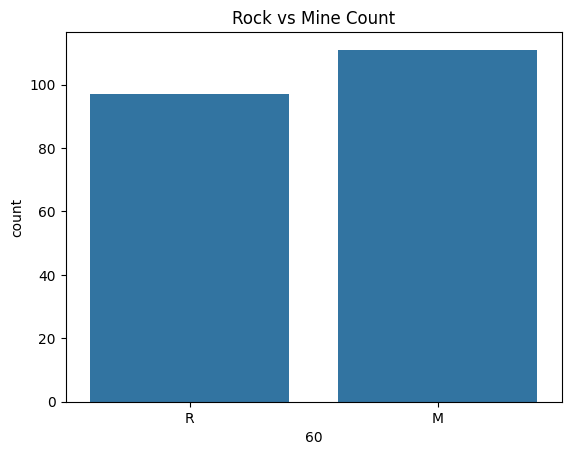

In [6]:
# Shape and info
print("Dataset shape:", df.shape)
print(df.info())

# First 5 rows
df.head()

# Class distribution
class_counts = df[60].value_counts()
print(class_counts)
sns.countplot(x=df[60])
plt.title("Rock vs Mine Count")
plt.show()


In [7]:
stats = df.describe().T
stats['range'] = stats['max'] - stats['min']
stats


,count,mean,std,min,25%,50%,75%,max,range
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371,0.1356
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339,0.2333
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059,0.3044
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264,0.4206
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010,0.3943
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823,0.3721
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729,0.3696
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590,0.4535
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828,0.6753
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106,0.6993


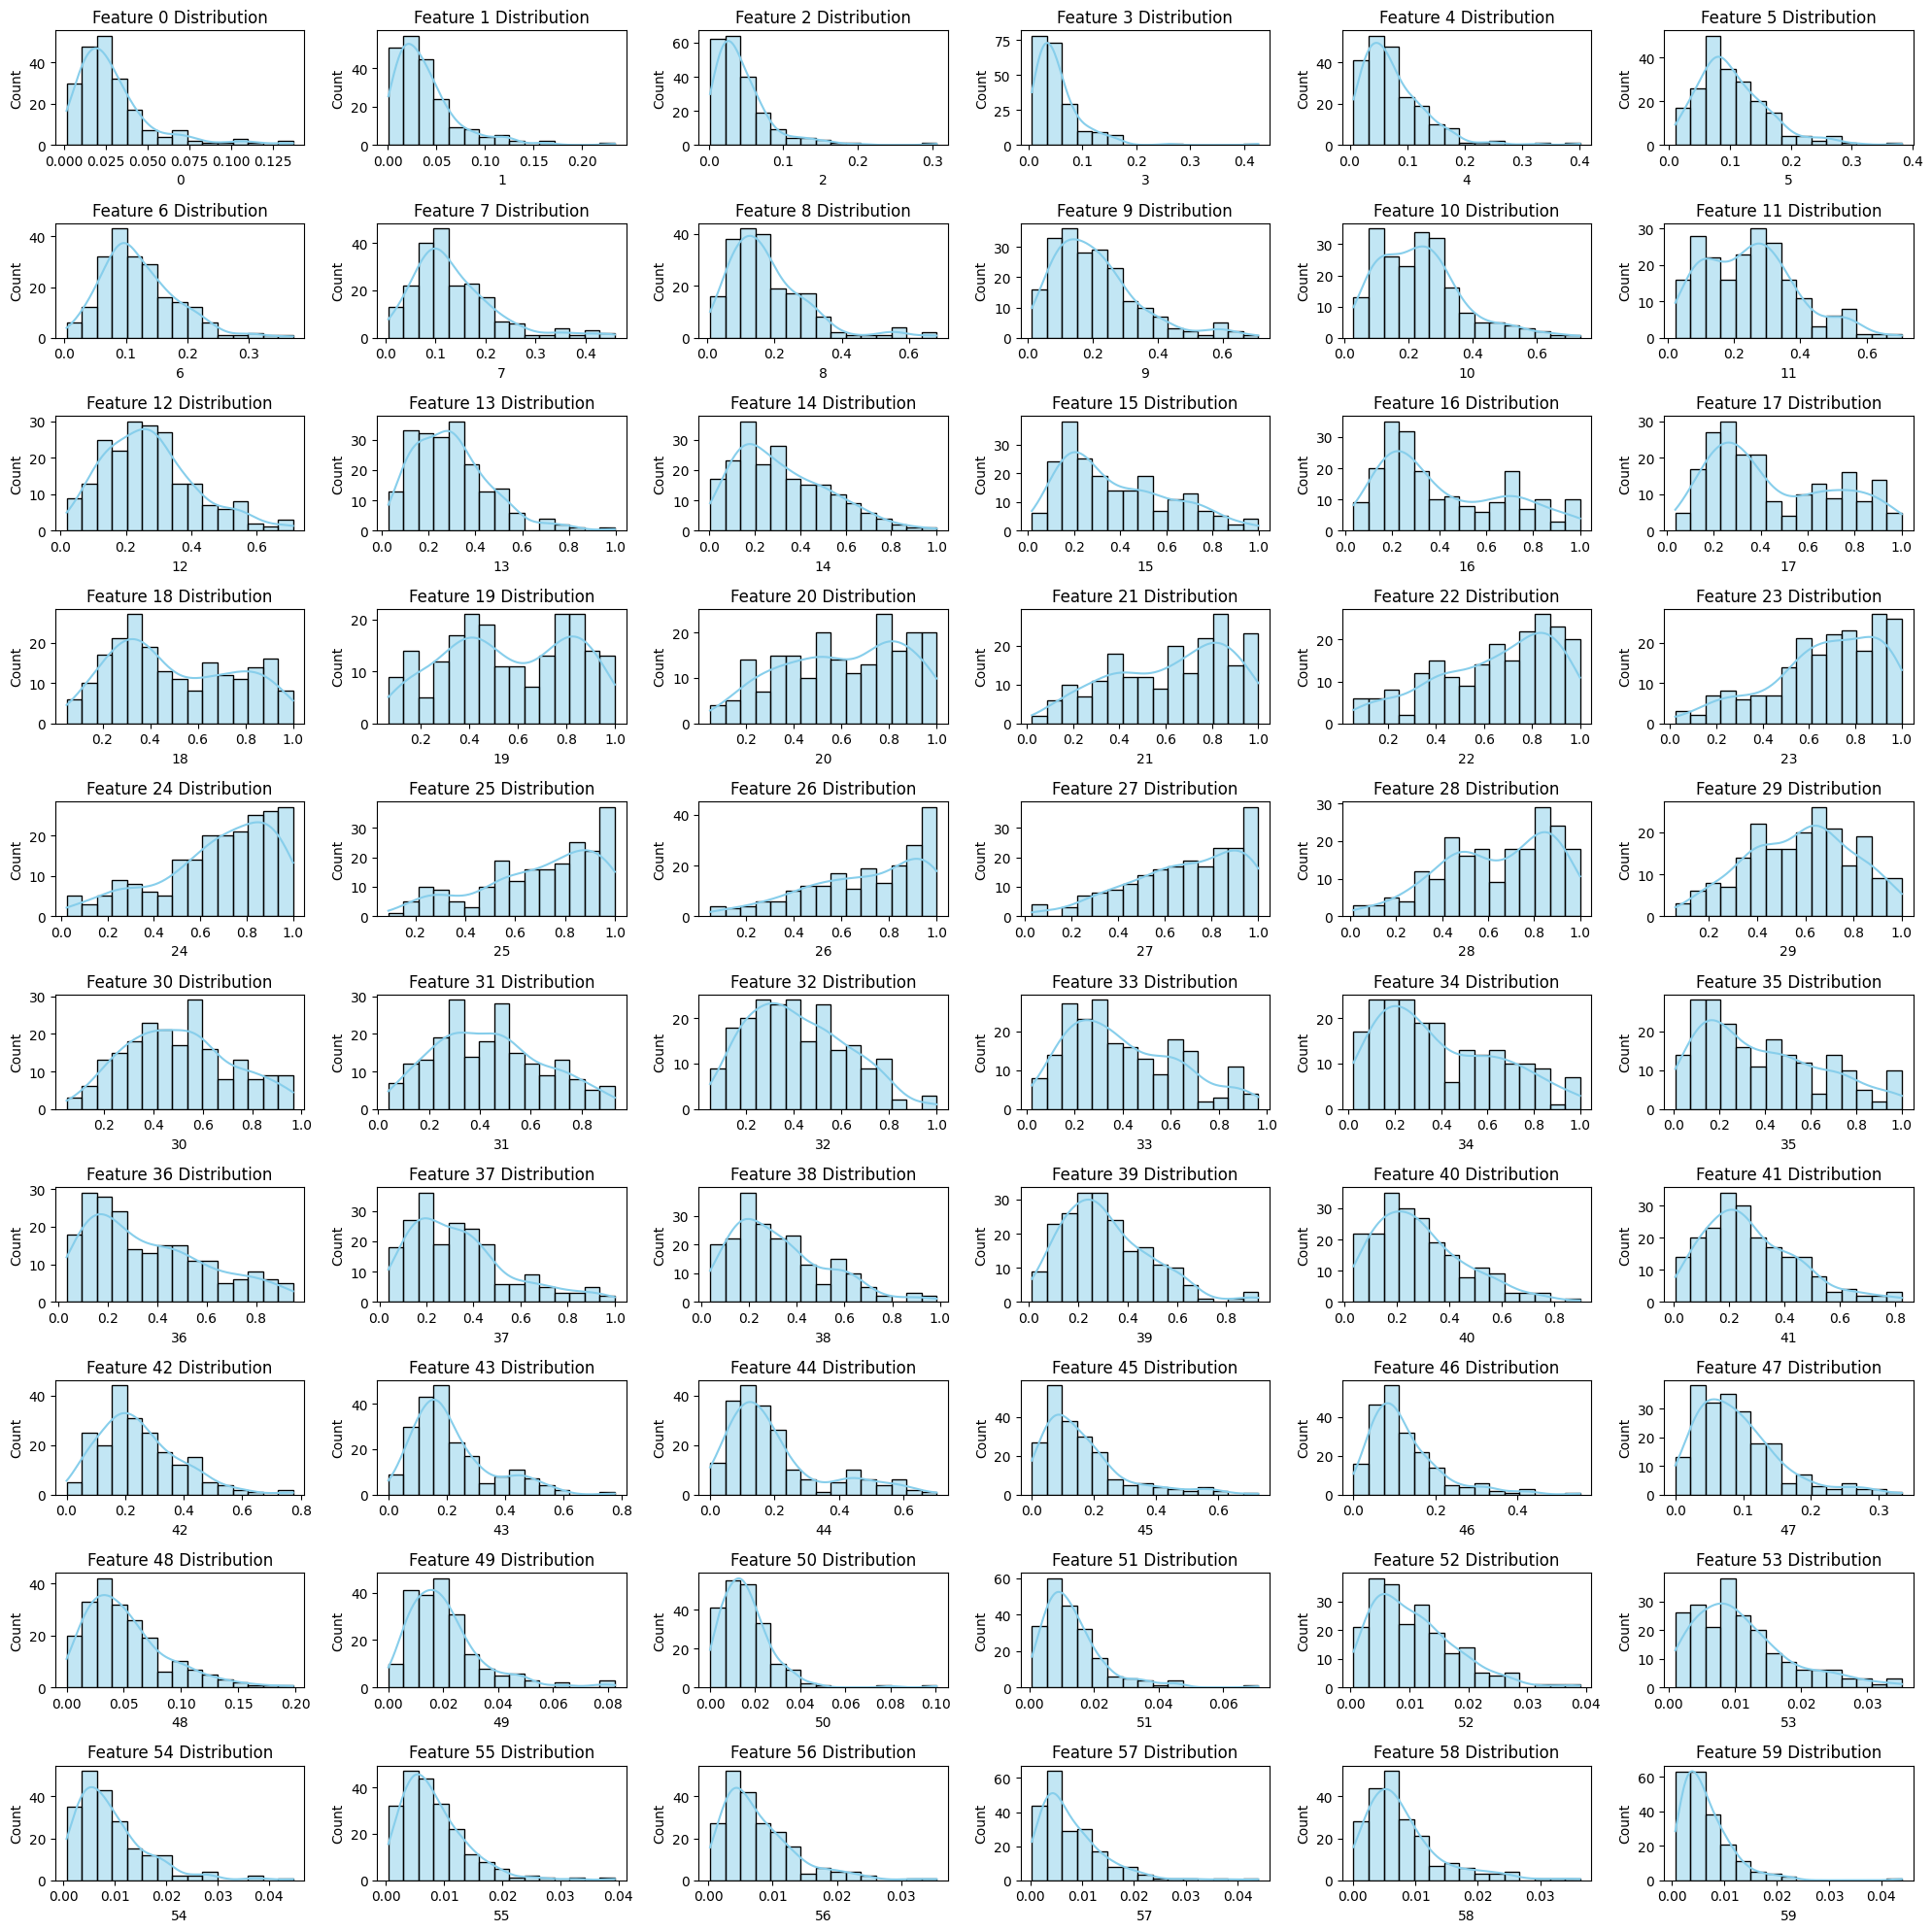

In [8]:
import math

features = df.columns[:-1]
num_cols = 6
num_rows = math.ceil(len(features)/num_cols)

plt.figure(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f"Feature {col} Distribution")
plt.tight_layout()
plt.show()


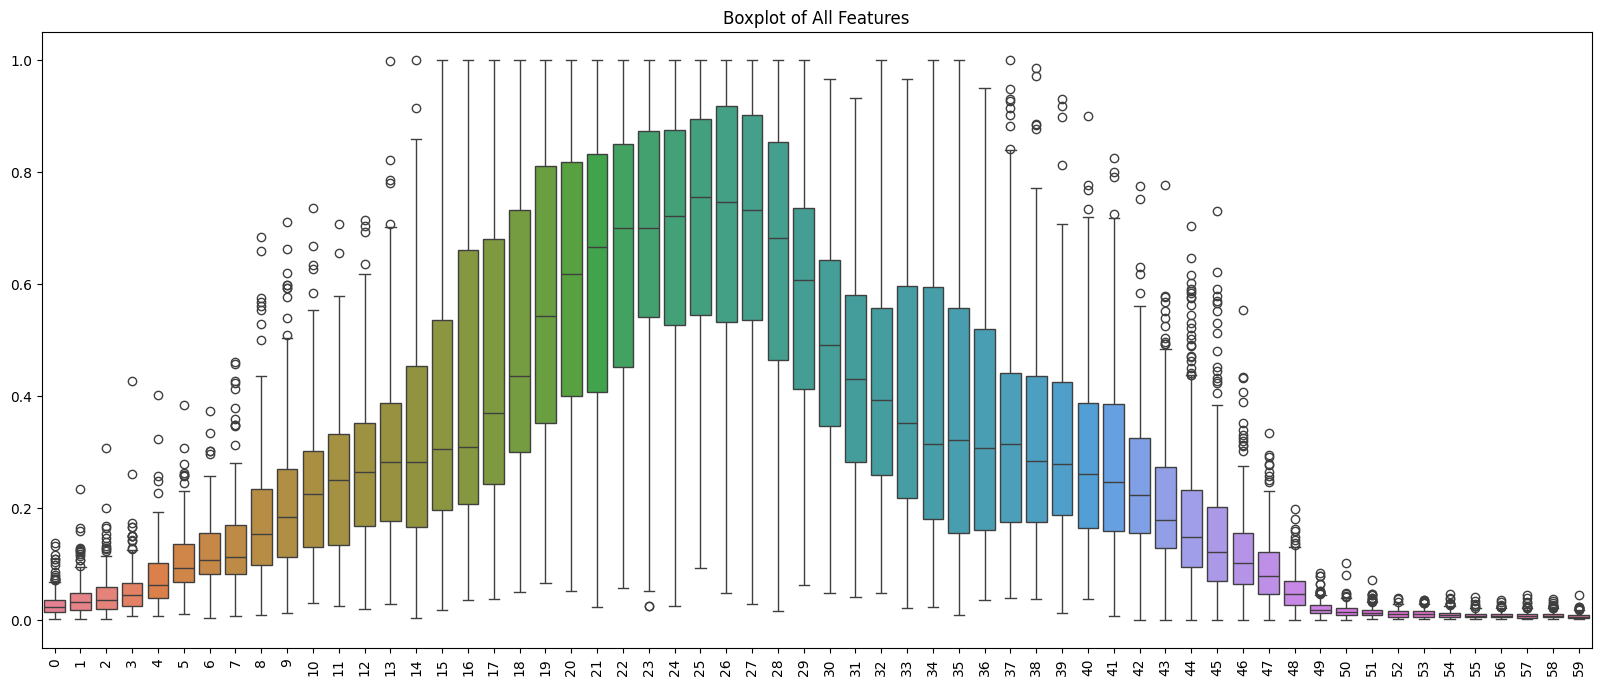

In [9]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot of All Features")
plt.xticks(rotation=90)
plt.show()


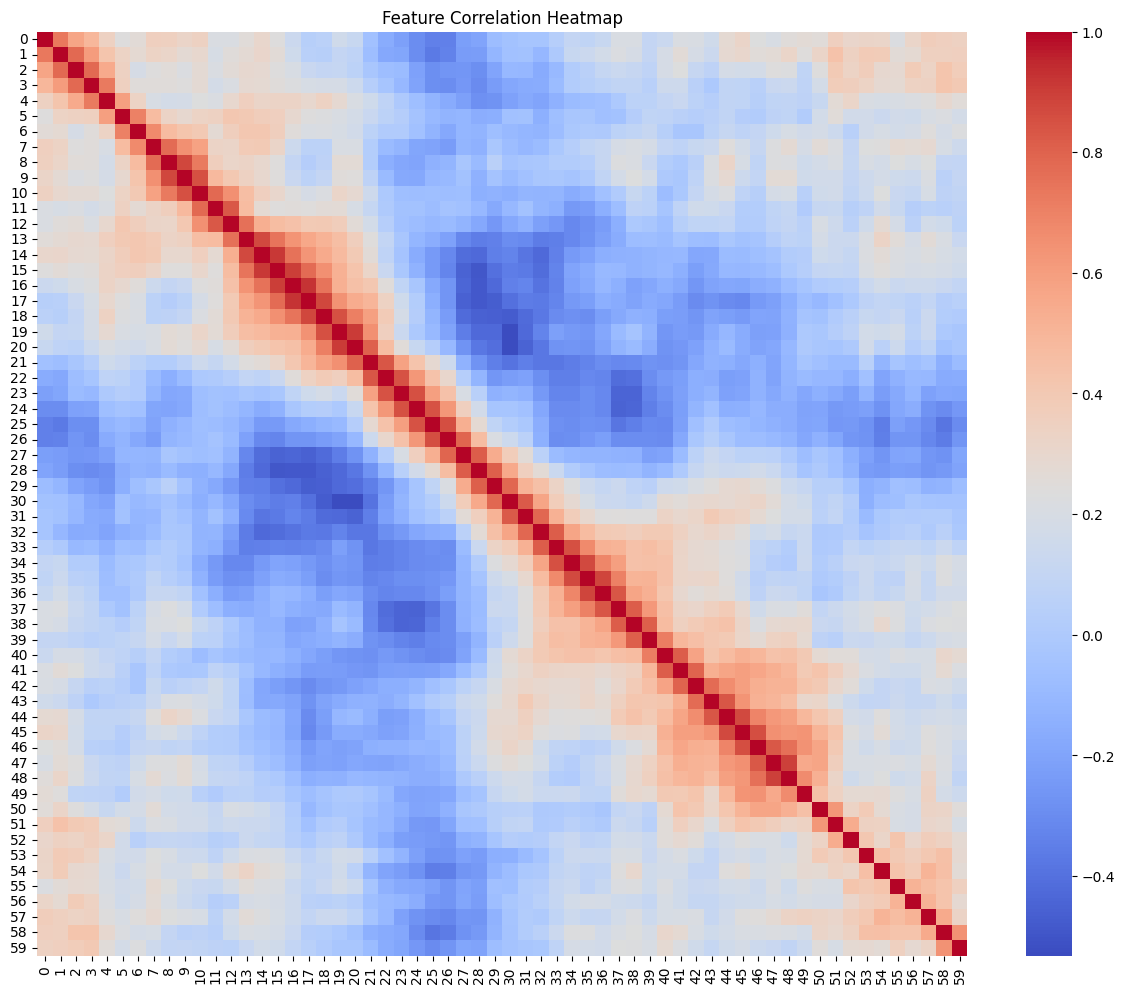

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(df.iloc[:, :-1].corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


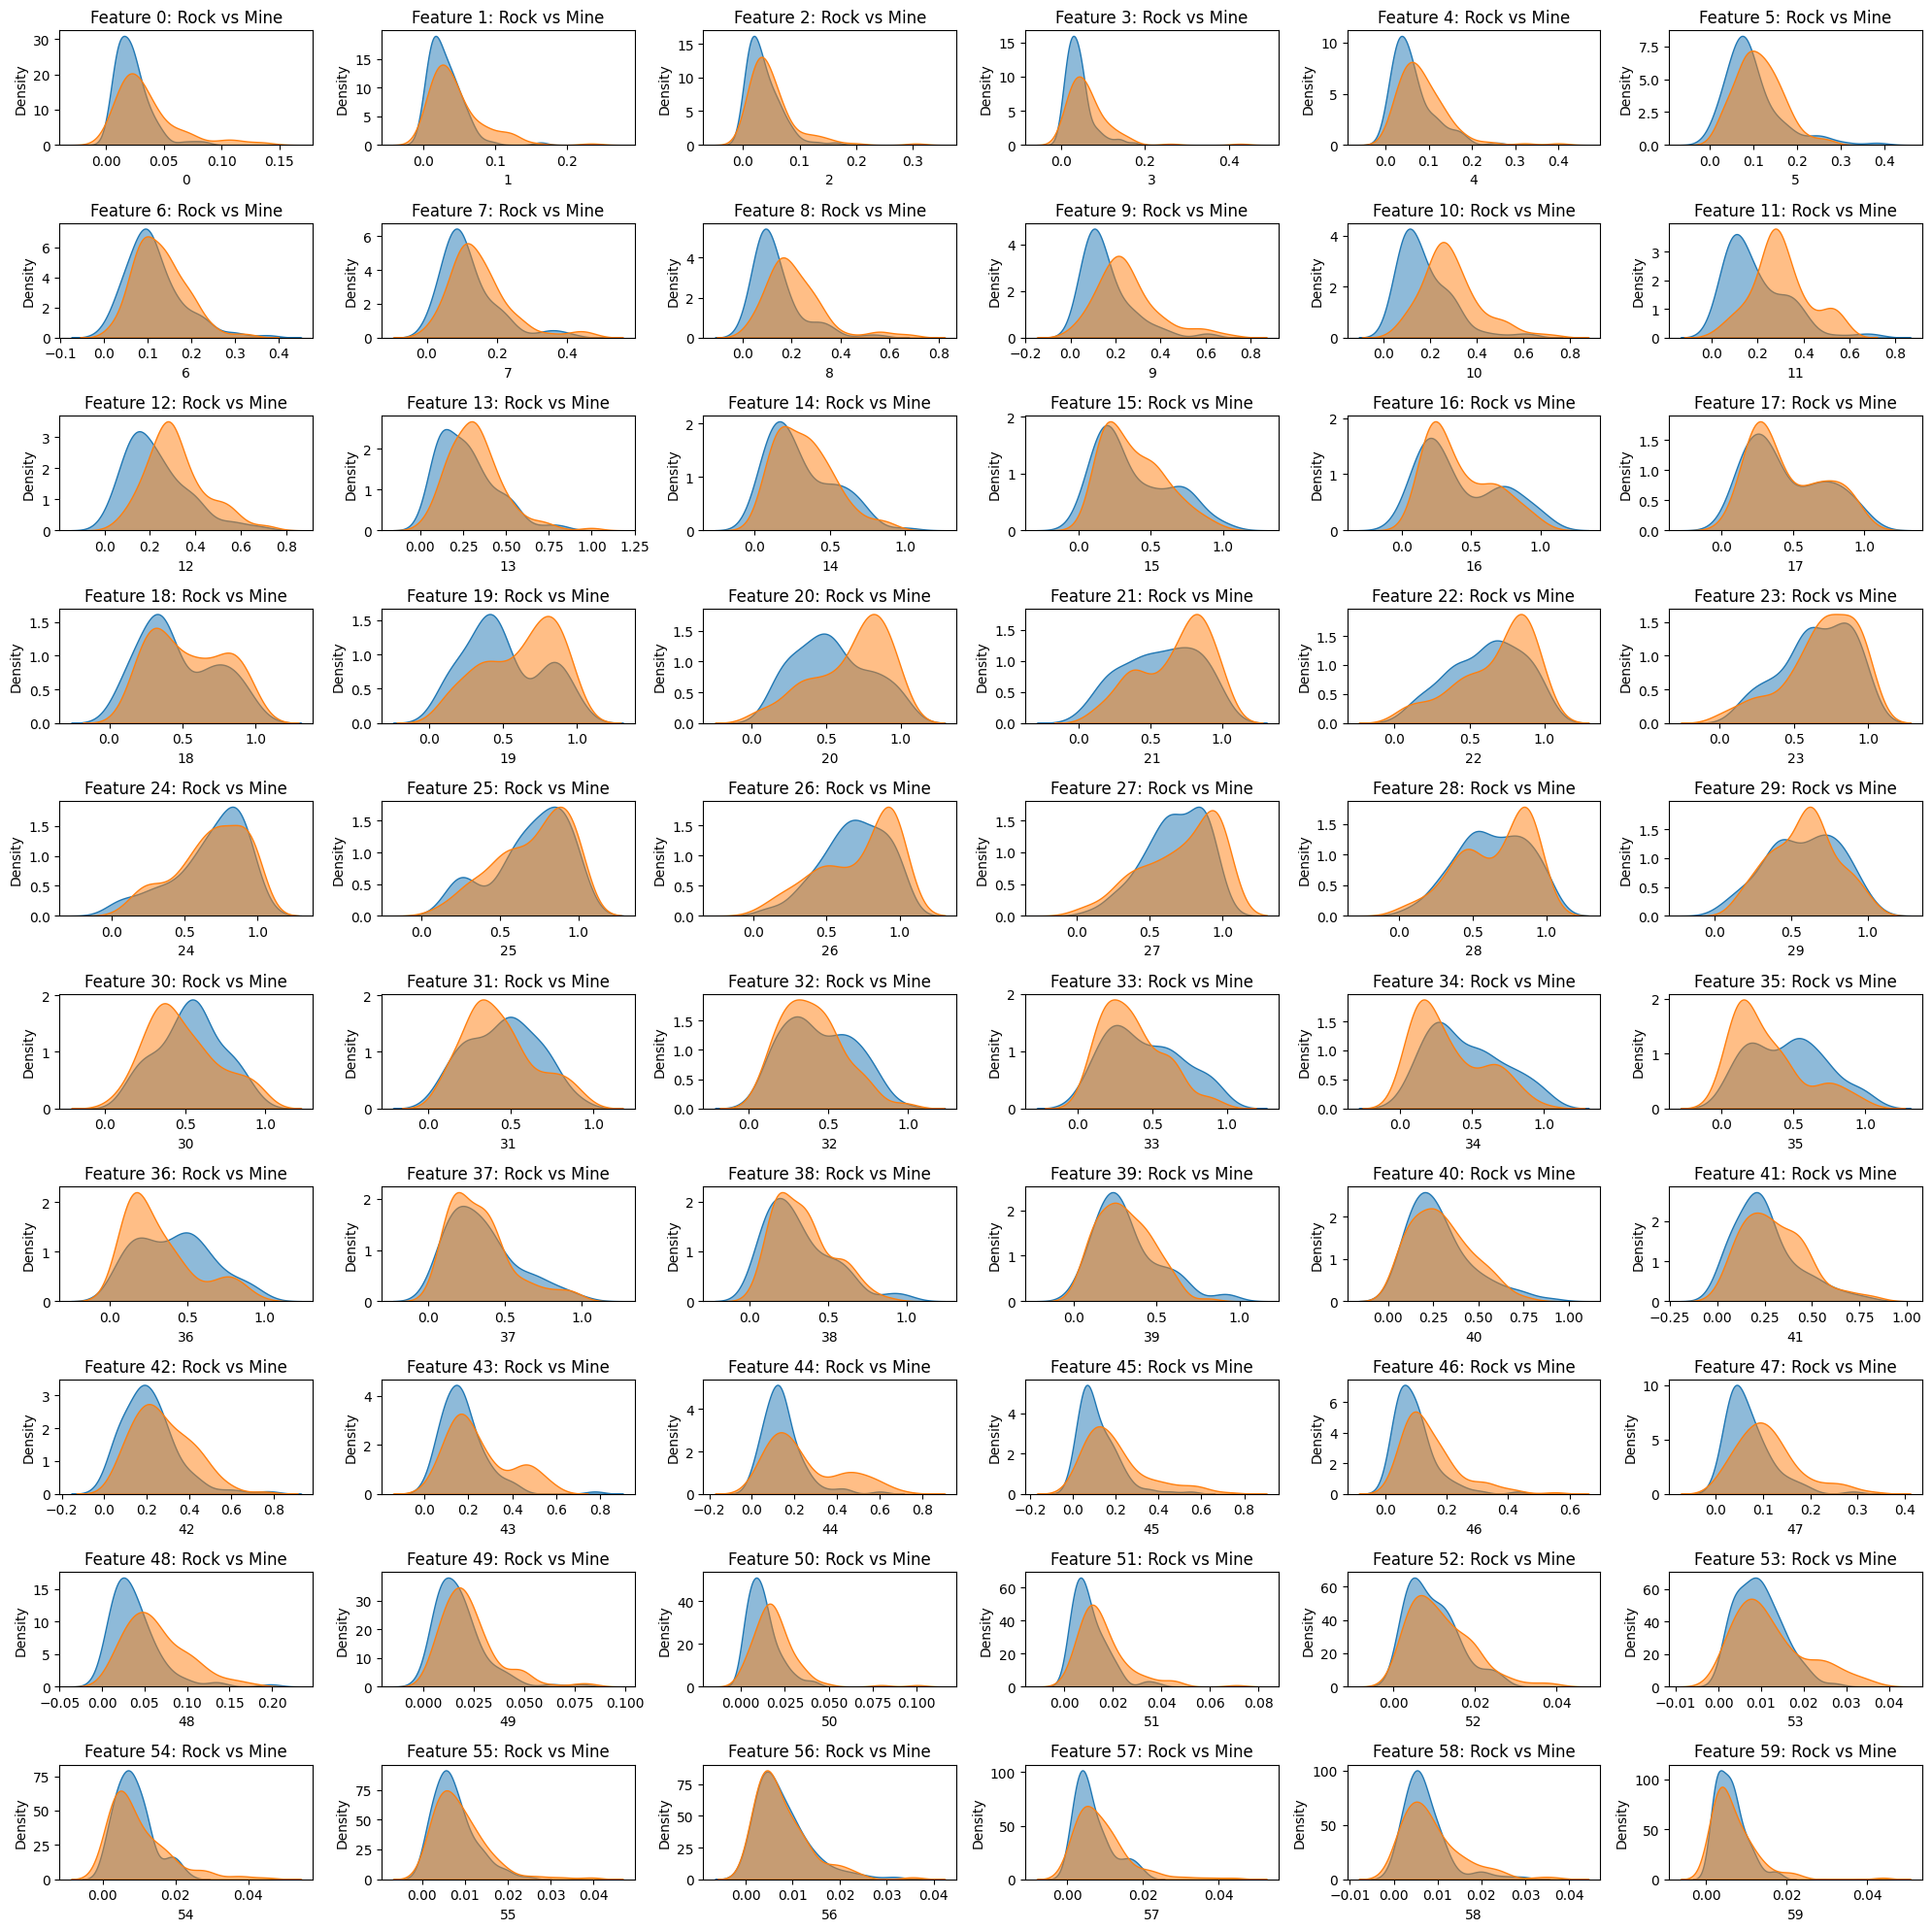

In [11]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(df[df[60]=='R'][col], label='Rock', fill=True, alpha=0.5)
    sns.kdeplot(df[df[60]=='M'][col], label='Mine', fill=True, alpha=0.5)
    plt.title(f"Feature {col}: Rock vs Mine")
plt.tight_layout()
plt.show()


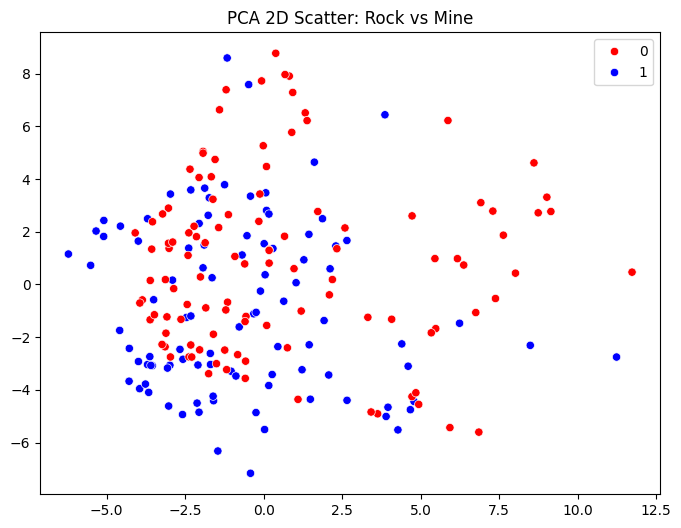

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1].values
y = LabelEncoder().fit_transform(df[60])

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=['red','blue'])
plt.title("PCA 2D Scatter: Rock vs Mine")
plt.show()


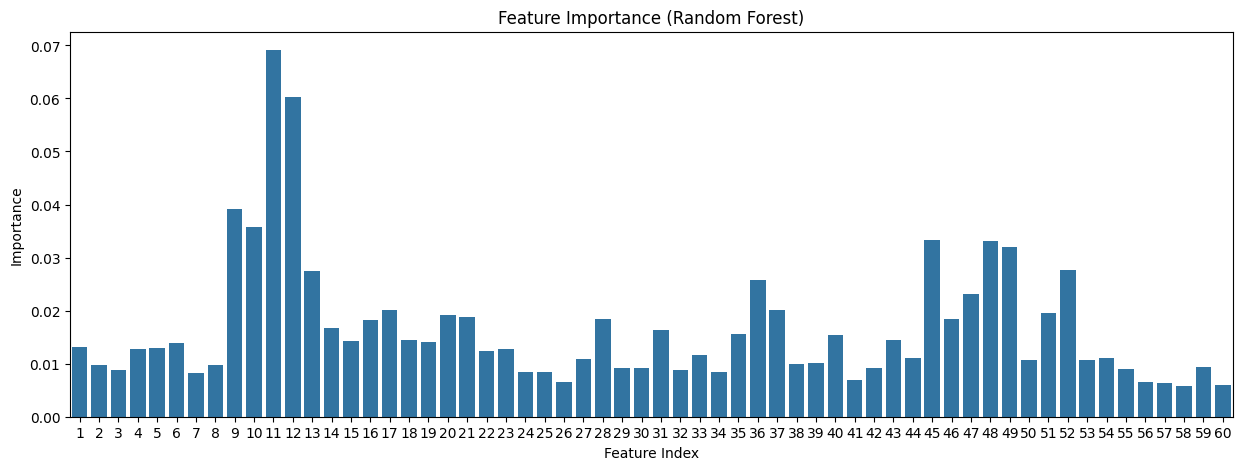

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_

plt.figure(figsize=(15,5))
sns.barplot(x=list(range(1,61)), y=importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


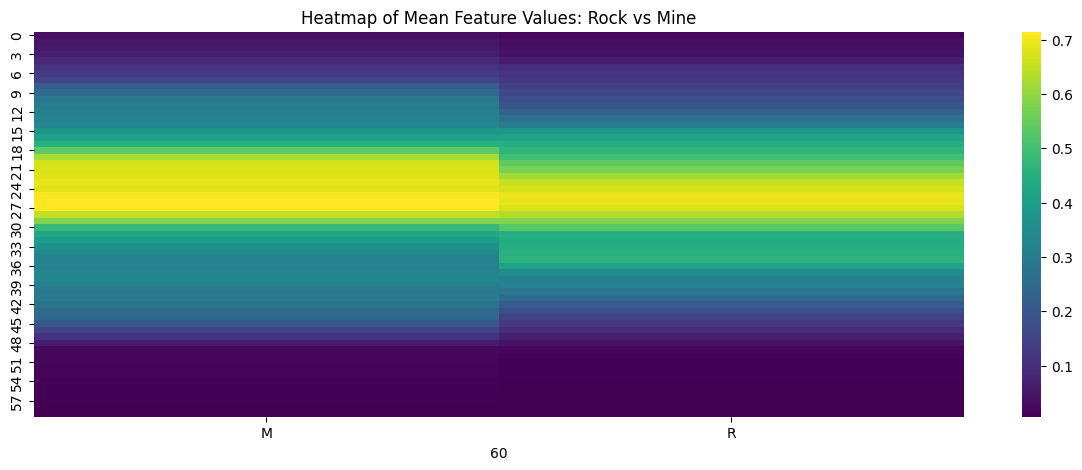

In [14]:
class_means = df.groupby(60).mean()
plt.figure(figsize=(15,5))
sns.heatmap(class_means.T, cmap='viridis')
plt.title("Heatmap of Mean Feature Values: Rock vs Mine")
plt.show()


4.1: Encode the labels

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df[60])  # 0 = Rock, 1 = Mine
X = df.iloc[:, :-1].values         # Features (first 60 columns)


In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Splitting into training and testing data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


4.3: Scale the Features

Features have different ranges → scaling puts them on the same scale (mean=0, variance=1).

Scaling is critical for SVM, Neural Networks, and Logistic Regression.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(32,16), max_iter=500)
}


Logistic Regression Accuracy: 0.81


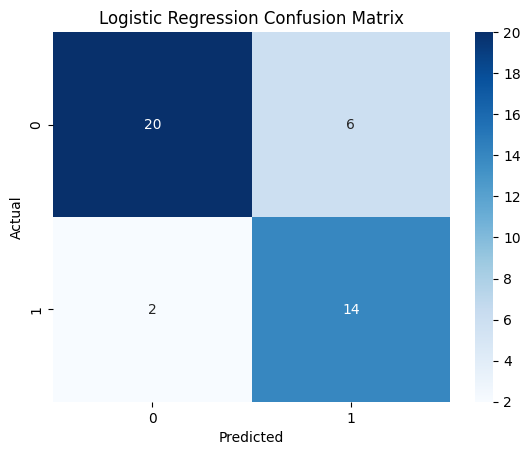

SVM Accuracy: 0.88


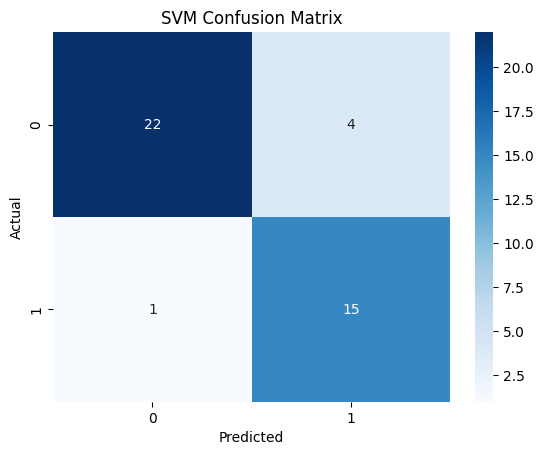

Random Forest Accuracy: 0.79


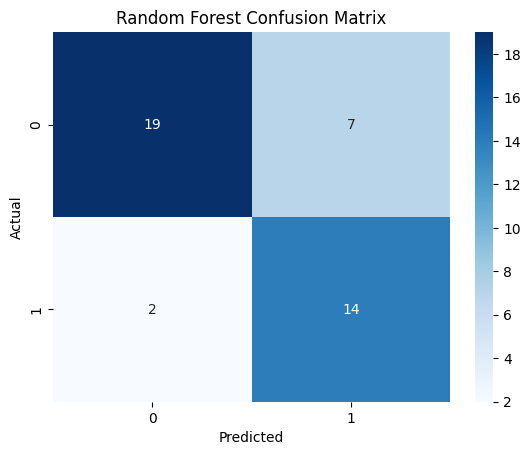

kNN Accuracy: 0.90


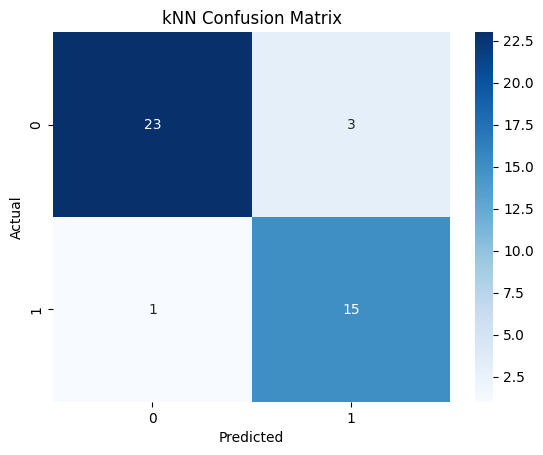

Neural Network Accuracy: 0.86


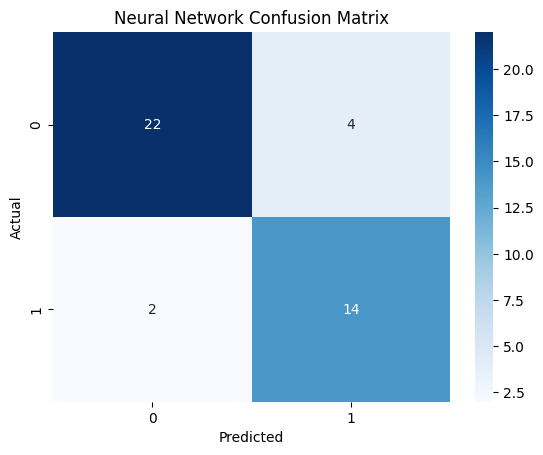

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.2f}")

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


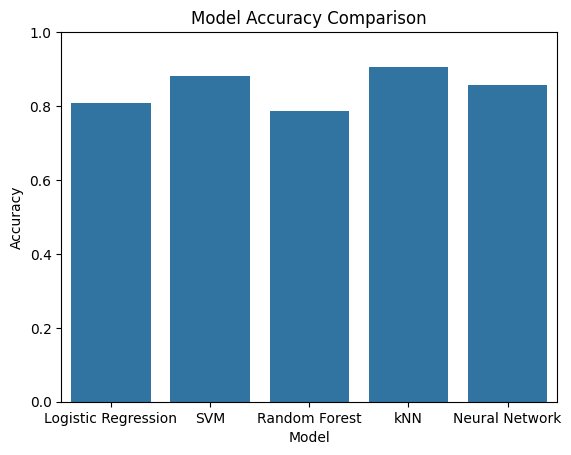

In [24]:
import pandas as pd

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.show()


Why kNN Can Beat Others?

Distance-based → kNN looks at “nearest neighbors” in 60-dimensional space.

Small dataset (208 rows) → simpler models like kNN don’t overfit easily.

Scaling matters → after StandardScaler, all features are on the same scale, so kNN can measure distances correctly.

Feature importance → top features (like 11 & 12) make separation easy, so neighbors cluster nicely.

In [25]:
# Example: Test multiple k values
for k in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred):.2f}")


k=3, Accuracy=0.95
k=5, Accuracy=0.90
k=7, Accuracy=0.86
k=9, Accuracy=0.83


In [26]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)

# Evaluate
y_pred_rf = grid_rf.predict(X_test)
print("Optimized RF Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Random Forest Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Optimized RF Accuracy: 0.7857142857142857


fine tuning MLP classifier

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(32,16), (64,32), (64,32,16)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500]
}

grid_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5)
grid_mlp.fit(X_train, y_train)

print("Best MLP Parameters:", grid_mlp.best_params_)

# Evaluate on test set
y_pred_mlp = grid_mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print("Optimized MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))


Best MLP Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 500}
Optimized MLP Accuracy: 0.8809523809523809


Fine tuning svm

In [28]:
param_grid_svm = {
    'C': [0.1, 1, 10, 50],
    'gamma': [0.01, 0.1, 1, 5],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)

# Evaluate on test set
y_pred_svm = grid_svm.predict(X_test)
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Best SVM Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.8571428571428571


Fine tuning the model that gives best results

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],     # different k values
    'weights': ['uniform', 'distance'],     # equal or distance-based
    'metric': ['euclidean', 'manhattan']    # distance metrics
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [30]:
print("Best kNN Parameters:", grid_knn.best_params_)

# Evaluate on test set
y_pred_knn = grid_knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("Optimized kNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Best kNN Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Optimized kNN Accuracy: 0.9047619047619048
